#### Raviteja Padala
<img align="left" img src= in.png height = 20 width="20"/>   https://www.linkedin.com/in/raviteja-padala/ <br>

<img align="left" img src= github.png height = 20 width="20"/> https://github.com/raviteja-padala


# Exploratory Data Analysis on Diabetes Dataset

Dataset: "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"

About the Data set: 

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- The Pima indians are a group of Native Americans living in an area consisting of what is now central and southern Arizona. 

- The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on..

- Diabetes is a chronic (long-lasting) health condition that affects how body turns food into energy. Predicing this chronic illness at an early stage saves on medical costs and reduces the risk of more complicated health problems. 

## Loading Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
#importng dataset

dataset=pd.read_csv("https://raw.githubusercontent.com/raviteja-padala/Datasets/main/diabetes-pima.csv")

In [3]:
#checking the dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# shape of dataset
dataset.shape

(768, 9)

## Features in Dataset

The Pima Indian Diabetes dataset has 768 rows, 9 columns, data in the columns:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function (DPF) calculates diabetes likelihood depending on the subject's age and family history.
- **Age**: Age (years)
- **Outcome**: Binary value indicating non-diabetic /diabetic

In [5]:
#top 5 rows data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Make copy of data set before making minor wrangling operations as we don't want to edit our row data

### creating copy of dataset for further analysis so that we can also perform data cleaning on copied dataset.

df=dataset.copy()

## Descriptive statistics in dataset

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Cheking Null values

In [8]:
# Checking Missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 <span style='color:Blue'> **Observation:** </span> 
 
There are no null values in any of the columns in the dataset.

## Cheking Unique values

In [9]:
# Unique values in data set
for feature in df.columns:
    print("{} has {} number of unique categories".format(feature, df[feature].nunique()))

Pregnancies has 17 number of unique categories
Glucose has 136 number of unique categories
BloodPressure has 47 number of unique categories
SkinThickness has 51 number of unique categories
Insulin has 186 number of unique categories
BMI has 248 number of unique categories
DiabetesPedigreeFunction has 517 number of unique categories
Age has 52 number of unique categories
Outcome has 2 number of unique categories


### Among the features, there are many features whose min() value is 0. Let's check out more of these features.

In [10]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<span style='color:Blue'> **Observation:** </span> 

From the above describe data we can see that Glucose, BloodPressure, SkinThickness, Insulin and BMI have min values as 0 which are not real clinical values. Lets look at counts.

In [11]:
#finding number of zeros each columnwise
print("Number of 0's in Glucose feature:", df['Glucose'].isin([0]).sum())
print("Number of 0's in Blood Pressure:", df['BloodPressure'].isin([0]).sum())
print("Number of 0's in Skin Thickness:", df['SkinThickness'].isin([0]).sum())
print("Number of 0's in Insulin:", df['Insulin'].isin([0]).sum())
print("Number of 0's in BMI:", df['BMI'].isin([0]).sum())

Number of 0's in Glucose feature: 5
Number of 0's in Blood Pressure: 35
Number of 0's in Skin Thickness: 227
Number of 0's in Insulin: 374
Number of 0's in BMI: 11


#### Plotting to have view about zero values

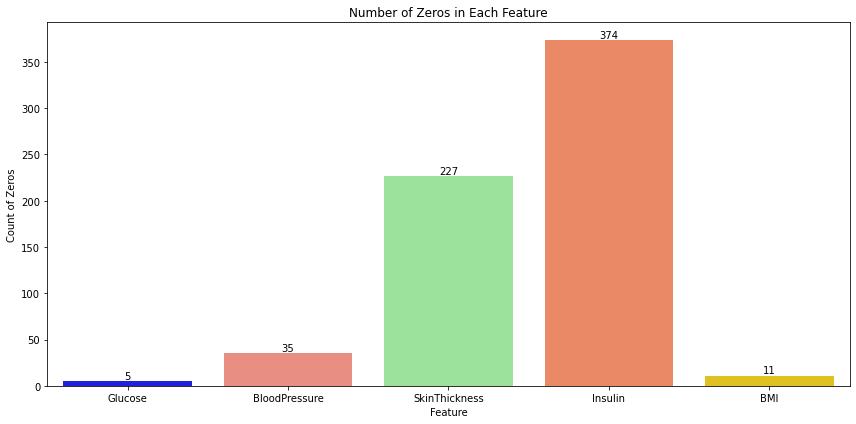

In [12]:
# Calculate the number of zeros in each column
zero_counts = {
    'Glucose': df['Glucose'].isin([0]).sum(),
    'BloodPressure': df['BloodPressure'].isin([0]).sum(),
    'SkinThickness': df['SkinThickness'].isin([0]).sum(),
    'Insulin': df['Insulin'].isin([0]).sum(),
    'BMI': df['BMI'].isin([0]).sum()
}

# Convert the dictionary to a DataFrame for plotting
zero_counts_df = pd.DataFrame.from_dict(zero_counts, orient='index', columns=['Count'])

# Reset the index to move the column names from the index to a separate column
zero_counts_df.reset_index(inplace=True)
zero_counts_df.rename(columns={'index': 'Feature'}, inplace=True)

# Set a custom color palette
custom_palette = ['blue', 'salmon', 'lightgreen', 'coral', 'gold']

# Plot the number of zeros for each feature using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=zero_counts_df, x='Feature', y='Count', palette=custom_palette)
plt.title("Number of Zeros in Each Feature")
plt.xlabel("Feature")
plt.ylabel("Count of Zeros")
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add data labels on top of the bars
for index, value in enumerate(zero_counts_df['Count']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [13]:
#finding out the percentage of zeros in each column wise

glucose = dataset['Glucose'].isin([0]).sum() / 768*100
print("Percentage of 0 values in Glocuse: %.2f" % glucose)

bloodpressure = dataset['BloodPressure'].isin([0]).sum() / 768*100
print("Percentage of 0 values in Blood Pressure: %.2f" % bloodpressure)

skinthickness = dataset['SkinThickness'].isin([0]).sum() / 768*100,
print("Percentage of 0 values in Skin Thickness: %.2f" % skinthickness)

insulin = dataset['Insulin'].isin([0]).sum() / 768*100
print("Percentage of 0 values in Insulin: %.2f" % insulin)

bmi = dataset['BMI'].isin([0]).sum() / 768*100
print("Percentage of 0 values in for BMI: %.2f" % bmi)

Percentage of 0 values in Glocuse: 0.65
Percentage of 0 values in Blood Pressure: 4.56
Percentage of 0 values in Skin Thickness: 29.56
Percentage of 0 values in Insulin: 48.70
Percentage of 0 values in for BMI: 1.43


<span style='color:Blue'> **Observation:** </span> 

We can see that the 0 values are between 0.65%-48.6% of data for these variables, we need to perform data cleaning to get even data.

In [14]:
#imputing 0 values with mean

# Columns to be imputed (replace this list with the column names in your DataFrame)
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Calculate the mean of the specified columns, excluding zeros
column_means = df[columns_to_impute].replace(0, pd.NA).mean()

# Impute the zeros with the mean in the specified columns
for col in columns_to_impute:
    df[col] = df[col].replace(0, column_means[col])

# The zeros in the specified columns have been replaced with the mean value


In [15]:
#checking minimum values after imputation

df[columns_to_impute].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.435949,12.096346,8.790942,85.021108,6.875151
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.202592,29.153420,155.548223,32.400000
75%,140.250000,80.000000,32.000000,155.548223,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


<span style='color:Blue'> **Observation:** </span> 

There are no zero values after imputation.

# Analaysing and Plotting Outcome variable

In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

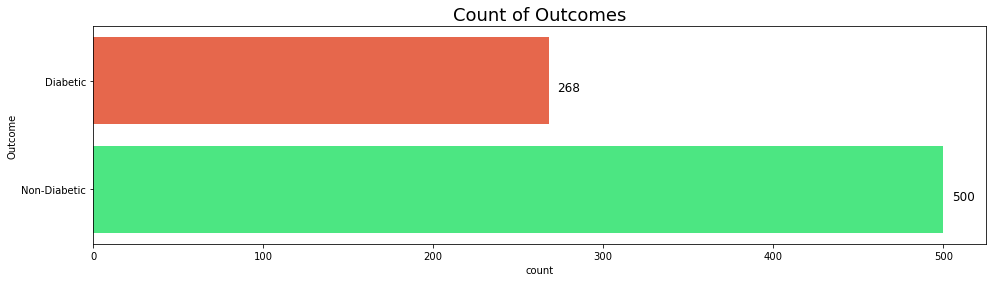

In [17]:
#  chart size
plt.rcParams['figure.figsize'] = (16, 4)  # Set the figure size (width, height) in inches

# Custom color palette (replace the colors with the ones you prefer)
custom_palette = ["#FF5733", "#33FF7A"]

# Create a dictionary to map the categories to custom labels
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}

# Create the countplot with horizontal orientation and custom color palette
ax = sns.countplot(y='Outcome', data=df.replace({'Outcome': category_labels}), palette=custom_palette, orient='h')

# Set the title and its size using matplotlib
plt.title("Count of Outcomes", fontsize=18)

# Add value counts as labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 5, p.get_y() + 0.5), fontsize=12, color='black')

# Show the plot
plt.show()


<span style='color:Blue'> **Observation:** </span> 

Count of Non-Diabetic individuals in the dataset is 500 and count of Diabetic individuals is 268

## Distribution of Independent variables

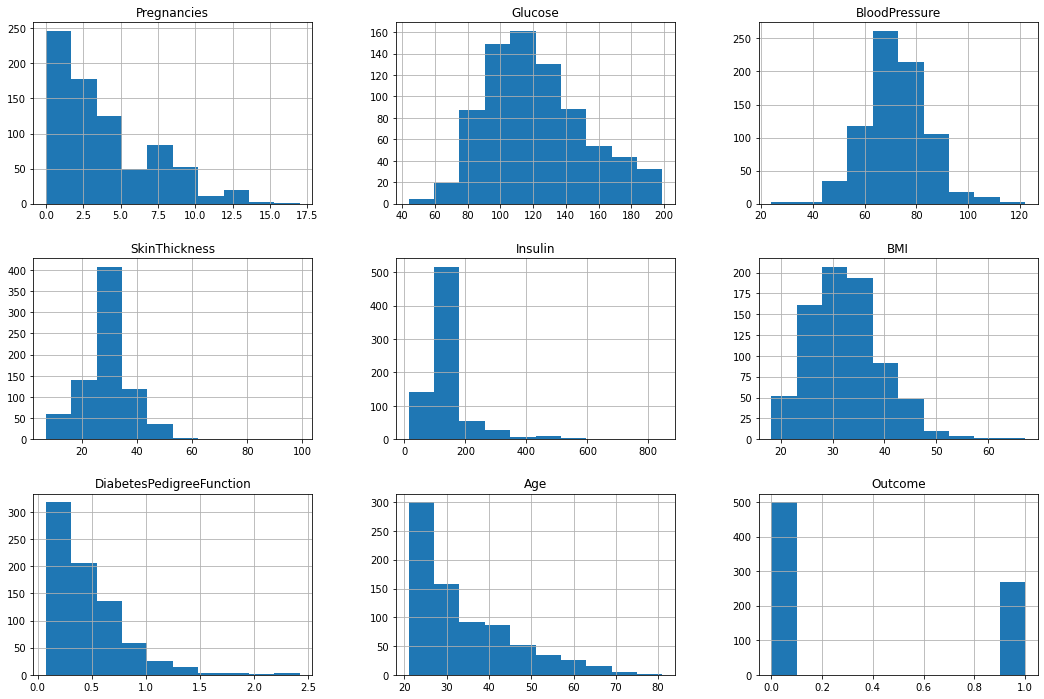

In [18]:
df.hist(figsize=(18,12))
plt.show()

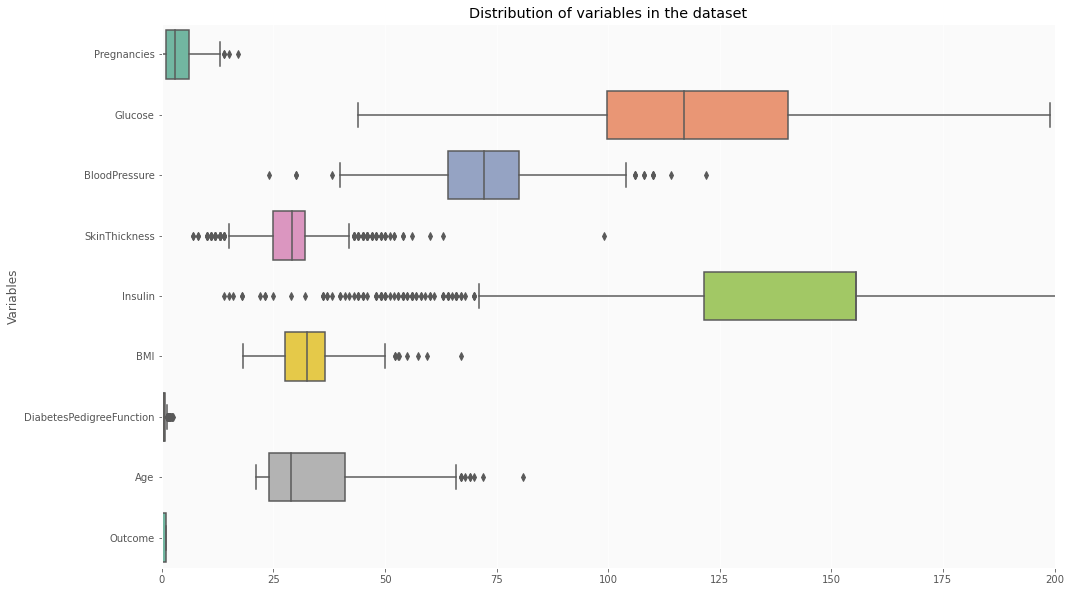

In [19]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(16, 10))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Distribution of variables in the dataset")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

<span style='color:Blue'> **Observation:** </span> 

The data presented in the table represents summary statistics for each column in the dataset. Let's interpret each column in detail:

1. **Pregnancies:**
   - Min: The minimum number of pregnancies recorded is 0, indicating some individuals have not been pregnant.
   - Max: The maximum number of pregnancies recorded is 17.

2. **Glucose:**
   - Mean: The average glucose level is approximately 120.89 mg/dL.
   - Min: The minimum value of Glucose is 44  mg/dL.
   - Max: The maximum glucose level recorded is 199 mg/dL.

3. **BloodPressure:**
   - Mean: The average blood pressure is approximately 69.11 mm Hg.
   - Min,Max: The minimum BloodPressure is 24 mm/Hg, and the maximum is 122 mm/Hg.
   
4. **SkinThickness:**
   - Mean: The average skin thickness is approximately 20.54 mm.
   - Min,Max: The minimum SkinThickness is 7mm, and the maximum skin thickness recorded is 99 mm.

5. **Insulin:**
   - Mean: The average insulin level is approximately 79.80 μU/mL.
   - Min: TThe minimum Insulin value is 14.
   - Max: The maximum insulin level recorded is 846 μU/mL. There are more outliers in insulin column

6. **BMI (Body Mass Index):**
   - Mean: The average BMI is approximately 31.99 kg/m^2.
   - Min: The minimum BMI recorded is 0, which might indicate missing or invalid data.
   - Max: The maximum BMI recorded is 67.1 kg/m^2.

7. **DiabetesPedigreeFunction:**
   - Mean: The average diabetes pedigree function value is approximately 0.47.
   - Min: The minimum diabetes pedigree function value recorded is 0.078.
   - Mxa: The maximum diabetes pedigree function value recorded is 2.420000


## Plotting Age vs Outcome

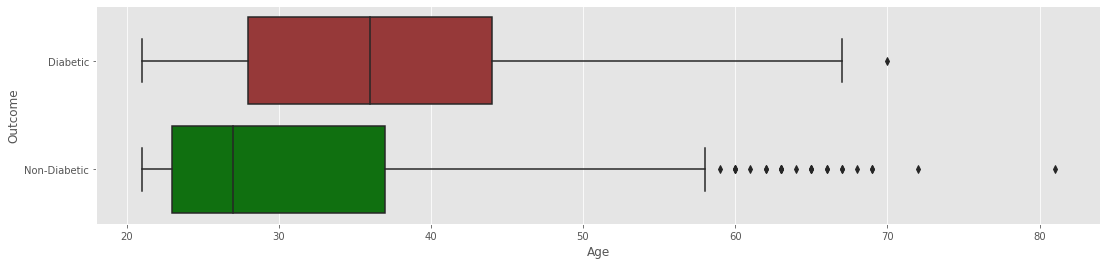

In [20]:
plt.rcParams['figure.figsize'] = (18, 4) 
# Define custom colors for the 'Outcome' categories
custom_palette = {"Non-Diabetic": "green", "Diabetic": "brown"}
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}            
sns.boxplot(y="Outcome",x='Age', data=df.replace({'Outcome': category_labels}),orient='h',palette=custom_palette)
# Show the plot
plt.show()

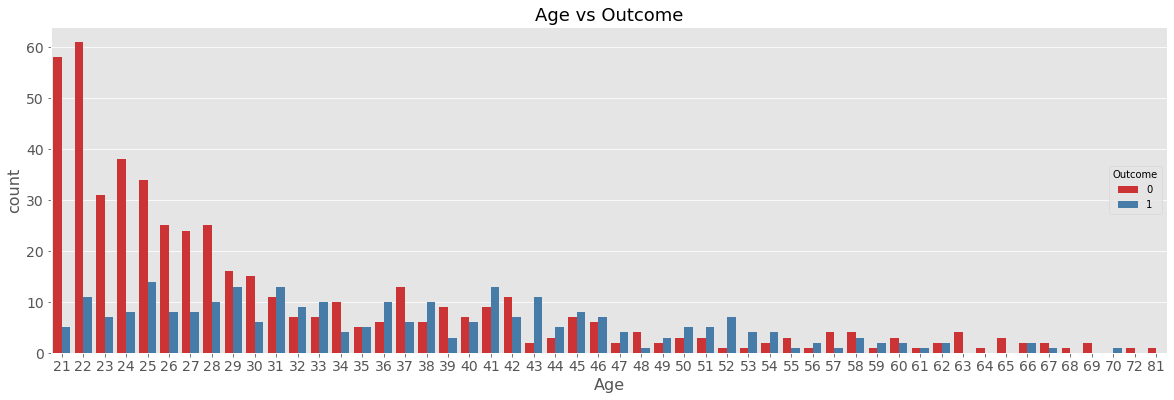

In [21]:

# chart size, labels size, and title size
plt.rcParams['figure.figsize'] = (20, 6)  # Set the figure size (width, height) in inches
plt.rcParams['axes.labelsize'] = 16       # Set the font size for the axis labels
plt.rcParams['xtick.labelsize'] = 14      # Set the font size for the x-axis tick labels
plt.rcParams['ytick.labelsize'] = 14      # Set the font size for the y-axis tick labels

# Create the countplot
sns.countplot(x='Age', hue='Outcome', data=df, palette='Set1')

# Set the title and its size using matplotlib
plt.title("Age vs Outcome", fontsize=18)

# Show the legend to the right of the plot
plt.legend(title='Outcome', loc='center right')

# Show the plot
plt.show()

<span style='color:Blue'> **Observation:** </span> 

Individuals with non diabetic were more in the age group range of 21 to 30, from age 31 diabetic individuals increased.

## Plotting Pregnancies vs Outcome

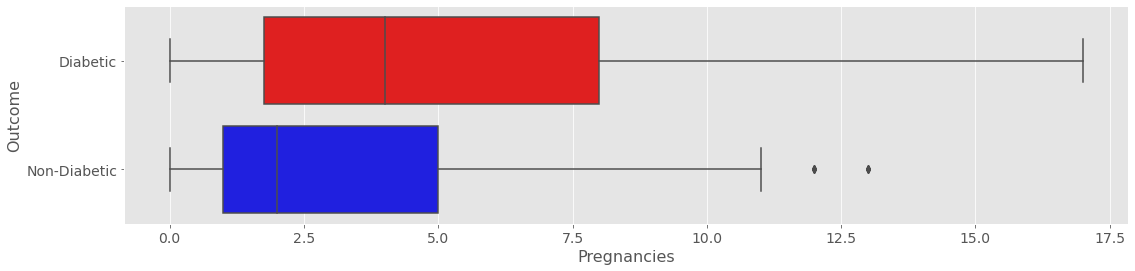

In [22]:
plt.rcParams['figure.figsize'] = (18, 4) 
# Define custom colors for the 'Outcome' categories
custom_palette = {"Non-Diabetic": "blue", "Diabetic": "red"}
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}            
sns.boxplot(y="Outcome",x='Pregnancies', data=df.replace({'Outcome': category_labels}),orient='h',palette=custom_palette)
# Show the plot
plt.show()

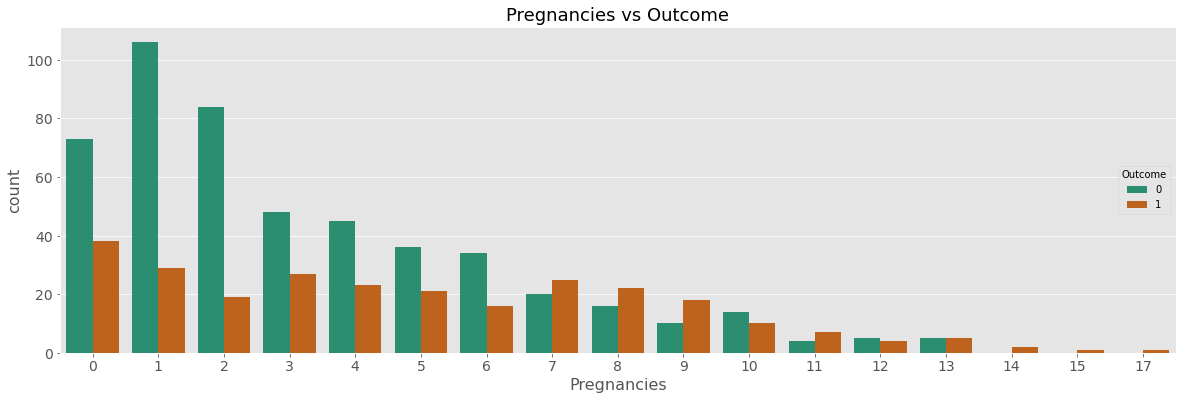

In [23]:
plt.rcParams['figure.figsize'] = (20, 6)  # Set the figure size (width, height) in inches
# Create the countplot
sns.countplot(x='Pregnancies', hue='Outcome', data=df, palette='Dark2')

# Set the title and its size using matplotlib
plt.title("Pregnancies vs Outcome", fontsize=18)

# Show the legend to the right of the plot
plt.legend(title='Outcome', loc='center right')

# Show the plot
plt.show()

<span style='color:Blue'> **Observation:** </span> 

Diabetes condition increased in individuals after 7 pregnancies, it is clearly evident that diabetic individuals are comparitevily more in individuals after 7 pregenancies.

## Plotting Glucose concentration vs Outcome

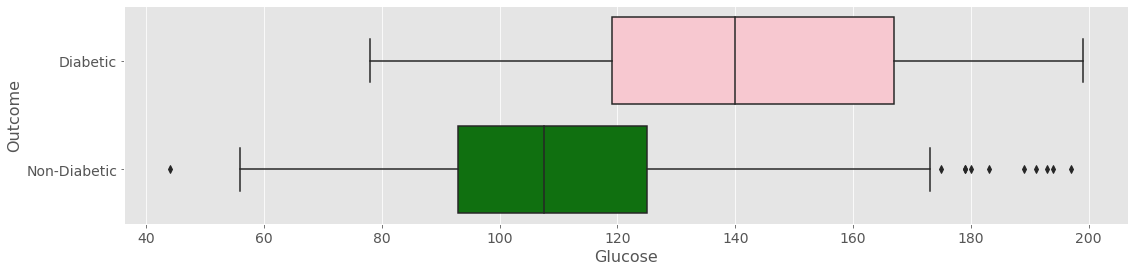

In [24]:
plt.rcParams['figure.figsize'] = (18, 4) 
# Define custom colors for the 'Outcome' categories
custom_palette = {"Non-Diabetic": "green", "Diabetic": "pink"}
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}            
sns.boxplot(y="Outcome",x='Glucose', data=df.replace({'Outcome': category_labels}),orient='h',palette=custom_palette)
# Show the plot
plt.show()

<span style='color:Blue'> **Observation:** </span> 

There is an increase in diabetic individuals distribution with increase in Plasma glucose concentration.

## Plotting Distribution of BloodPressure vs Outcome

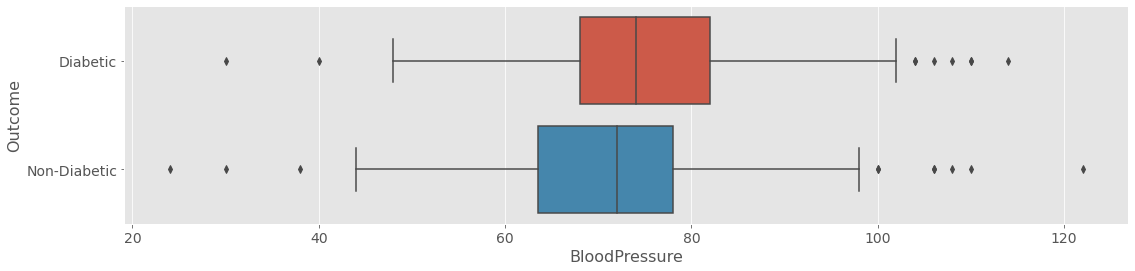

In [25]:
plt.rcParams['axes.labelsize'] = 16       # Set the font size for the axis labels
plt.rcParams['xtick.labelsize'] = 14      # Set the font size for the x-axis tick labels
plt.rcParams['ytick.labelsize'] = 14      # Set the font size for the y-axis tick labels
plt.rcParams['figure.figsize'] = (18, 4) 
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}            
sns.boxplot(y="Outcome", x='BloodPressure', data=df.replace({'Outcome': category_labels}), orient = 'h')
# Show the plot
plt.show()

<span style='color:Blue'> **Observation:** </span> 

The mean of blood pressure is centered around 70mm/hg and there is an increase in diabetic individuals distribution with increase in blood pressure.

## SkinThickness vs Outcome

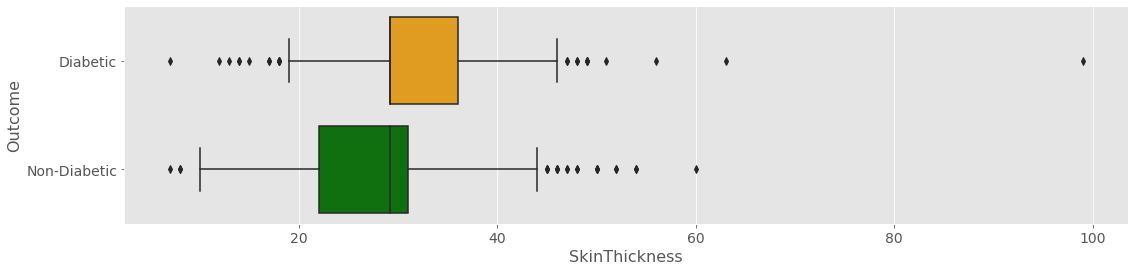

In [26]:
plt.rcParams['figure.figsize'] = (18, 4) 
# Define custom colors for the 'Outcome' categories
custom_palette = {"Non-Diabetic": "green", "Diabetic": "orange"}
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}            
sns.boxplot(y="Outcome",x='SkinThickness', data=df.replace({'Outcome': category_labels}),orient='h',palette=custom_palette)
# Show the plot
plt.show()

<span style='color:Blue'> **Observation:** </span> 

There is an increase in diabetic individuals distribution with increase in SkinThickness.

## Insulin level vs Outcome

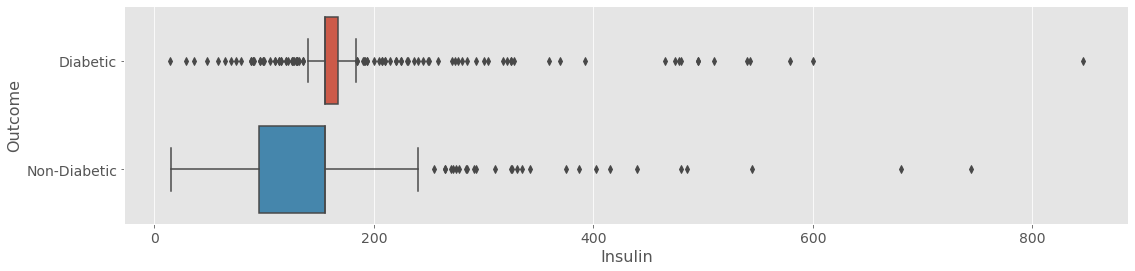

In [27]:
plt.rcParams['figure.figsize'] = (18, 4) 
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}            
sns.boxplot(y="Outcome", x='Insulin', data=df.replace({'Outcome': category_labels}), orient = 'h')
# Show the plot
plt.show()

<span style='color:Blue'> **Observation:** </span> 

The mean of 2-Hour serum insulin (mu U/ml) is centered around 79.80 μU/mL and there is slight increase in diabetic individuals distribution with increase in BMI.

## Distribution of BMI vs Outcome

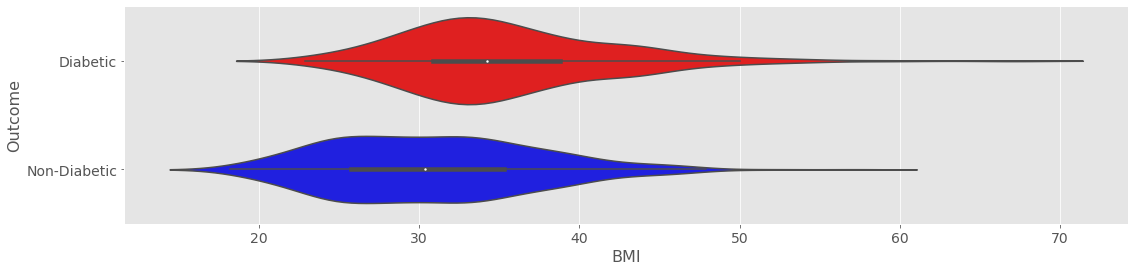

In [28]:
# Define custom colors for the 'Outcome' categories
custom_palette = {"Non-Diabetic": "blue", "Diabetic": "red"}

# Create the box plot with custom colors
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}
sns.violinplot(y="Outcome", x='BMI', data=df.replace({'Outcome': category_labels}), orient='h', palette=custom_palette)
plt.show()

<span style='color:Blue'> **Observation:** </span> 

The mean of BMI is centered around 31 and there is an increase in diabetic individuals distribution with increase in BMI.

## Distribution of DiabetesPedigreeFunction vs Outcome 

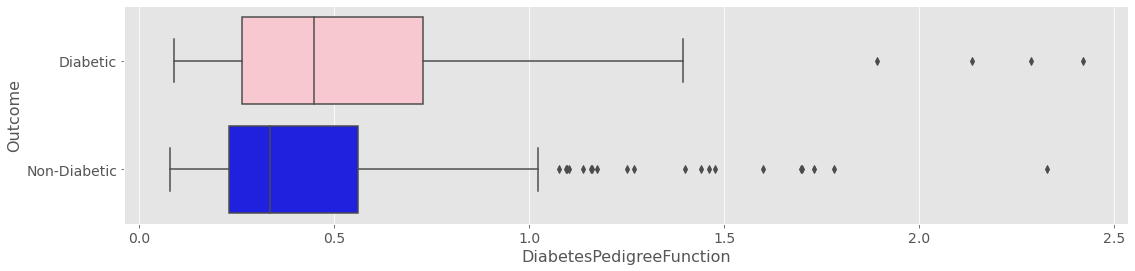

In [29]:
# Define custom colors for the 'Outcome' categories
custom_palette = {"Non-Diabetic": "blue", "Diabetic": "pink"}

# Create the box plot with custom colors
category_labels = {0: 'Non-Diabetic', 1: 'Diabetic'}
sns.boxplot(y="Outcome", x='DiabetesPedigreeFunction', data=df.replace({'Outcome': category_labels}), orient='h', palette=custom_palette)
plt.show()

<span style='color:Blue'> **Observation:** </span> 

There is an increase in diabetic individuals distribution with increase in DiabetesPedigreeFunction.

## Age vs Pregnancies vs Outcome

In [30]:

# Use pivot_table to calculate the sum of pregnancies for each age group and diabetic outcome combination
age_outcome_pregnancies = df.pivot_table(index='Age', columns='Outcome', values='Pregnancies', aggfunc='sum', fill_value=0)

# Add the 'Pregnancies' column to the pivot table
age_outcome_pregnancies['Total Pregnancies'] = age_outcome_pregnancies.sum(axis=1)

# Display the result
print(age_outcome_pregnancies)


Outcome   0   1  Total Pregnancies
Age                               
21       65   3                 68
22       88  24                112
23       47  13                 60
24       78   9                 87
25       59  26                 85
26       53  12                 65
27       59  23                 82
28       86  20                106
29       45  51                 96
30       56  20                 76
31       44  49                 93
32       27  44                 71
33       30  39                 69
34       55  27                 82
35       33  17                 50
36       28  55                 83
37       72  28                100
38       36  74                110
39       66  23                 89
40       37  44                 81
41       67  76                143
42       72  52                124
43       11  90                101
44       12  46                 58
45       51  59                110
46       29  54                 83
47       15  35     

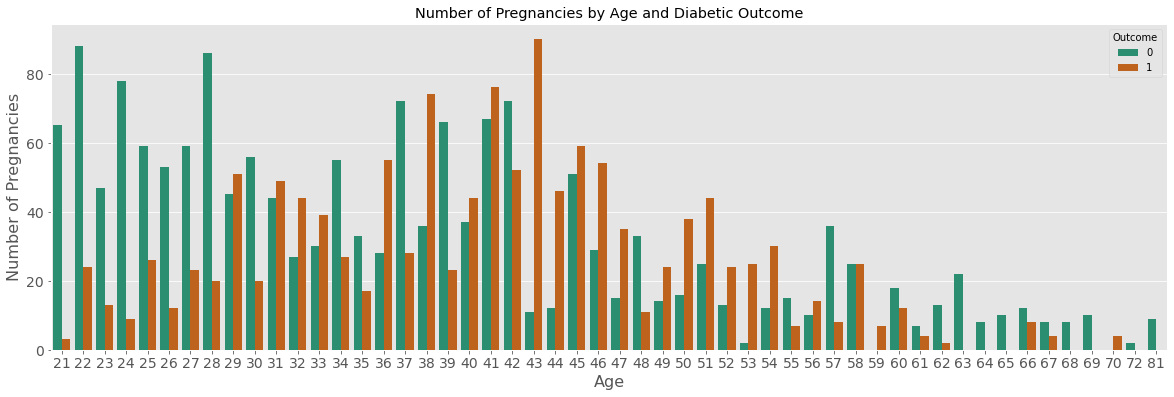

In [31]:
# Pivot the table to get 'Pregnancies' by 'Age' and 'Outcome'
age_outcome_pregnancies = df.pivot_table(index='Age', columns='Outcome', values='Pregnancies', aggfunc='sum')

# Reset the index to get 'Age' as a regular column
age_outcome_pregnancies.reset_index(inplace=True)

# Convert the DataFrame to long format using melt
age_outcome_pregnancies_long = age_outcome_pregnancies.melt(id_vars='Age', var_name='Outcome', value_name='Number of Pregnancies')

# Create the count plot
plt.figure(figsize=(20, 6))
sns.barplot(x='Age', y='Number of Pregnancies', hue='Outcome', data=age_outcome_pregnancies_long, palette='Dark2')

# Set the title and labels
plt.title('Number of Pregnancies by Age and Diabetic Outcome')
plt.xlabel('Age')
plt.ylabel('Number of Pregnancies')

# Set the legend position to 'upper right'
plt.legend(title='Outcome', loc='upper right')

# Show the plot
plt.show()


<span style='color:Blue'> **Observation:** </span> 

- **Age and Diabetes**: As age increases, the number of diabetic patients tends to increase until the age of 41, after which it starts to fluctuate and decrease gradually.

- **Diabetic Patients**: The age group with the highest number of diabetic patients is 41, where there are 76 diabetic patients. This is followed by age groups 38 and 43, with 74 and 90 diabetic patients, respectively.

- **Non-Diabetic Patients**: For most age groups, the number of non-diabetic patients is significantly higher than the number of diabetic patients.

### Plotting Age factor and BMI on Outcome

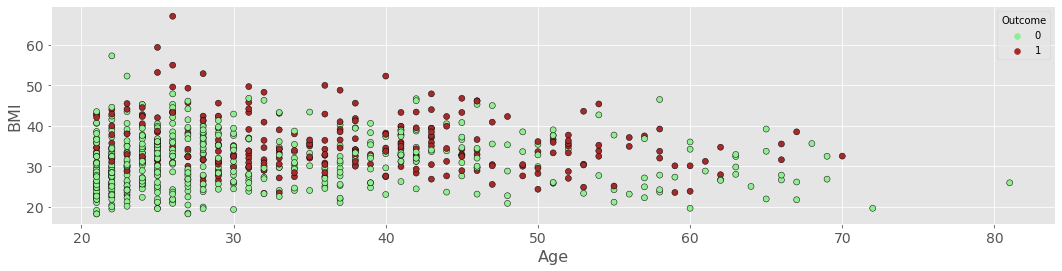

In [32]:

palette ={0 : 'lightgreen', 1 : 'brown'}
edgecolor = 'black'
sns.scatterplot(y = df['BMI'], x = df['Age'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.show()

<span style='color:Blue'> **Observation:** </span> 

Higher BMI values contributed to more Diabetic outcomes

### Plotting Age factor and Glucose on Outcome

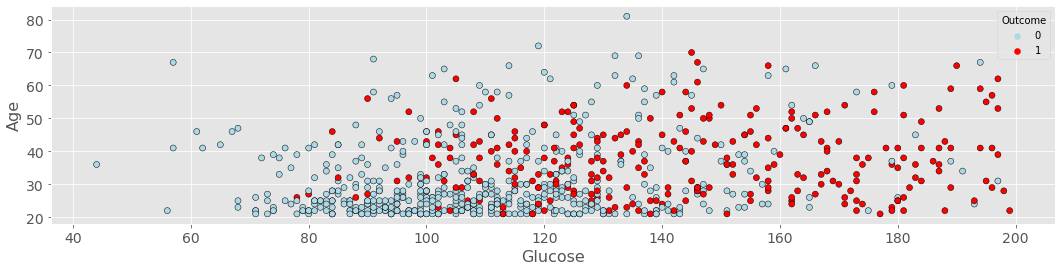

In [33]:
palette ={0 : 'lightblue', 1 : 'red'}
edgecolor = 'black'
sns.scatterplot(x = df['Glucose'], y = df['Age'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.show()

<span style='color:Blue'> **Observation:** </span> 

With increasing age and higher glucose levels , the Diabetic outcomes increased.

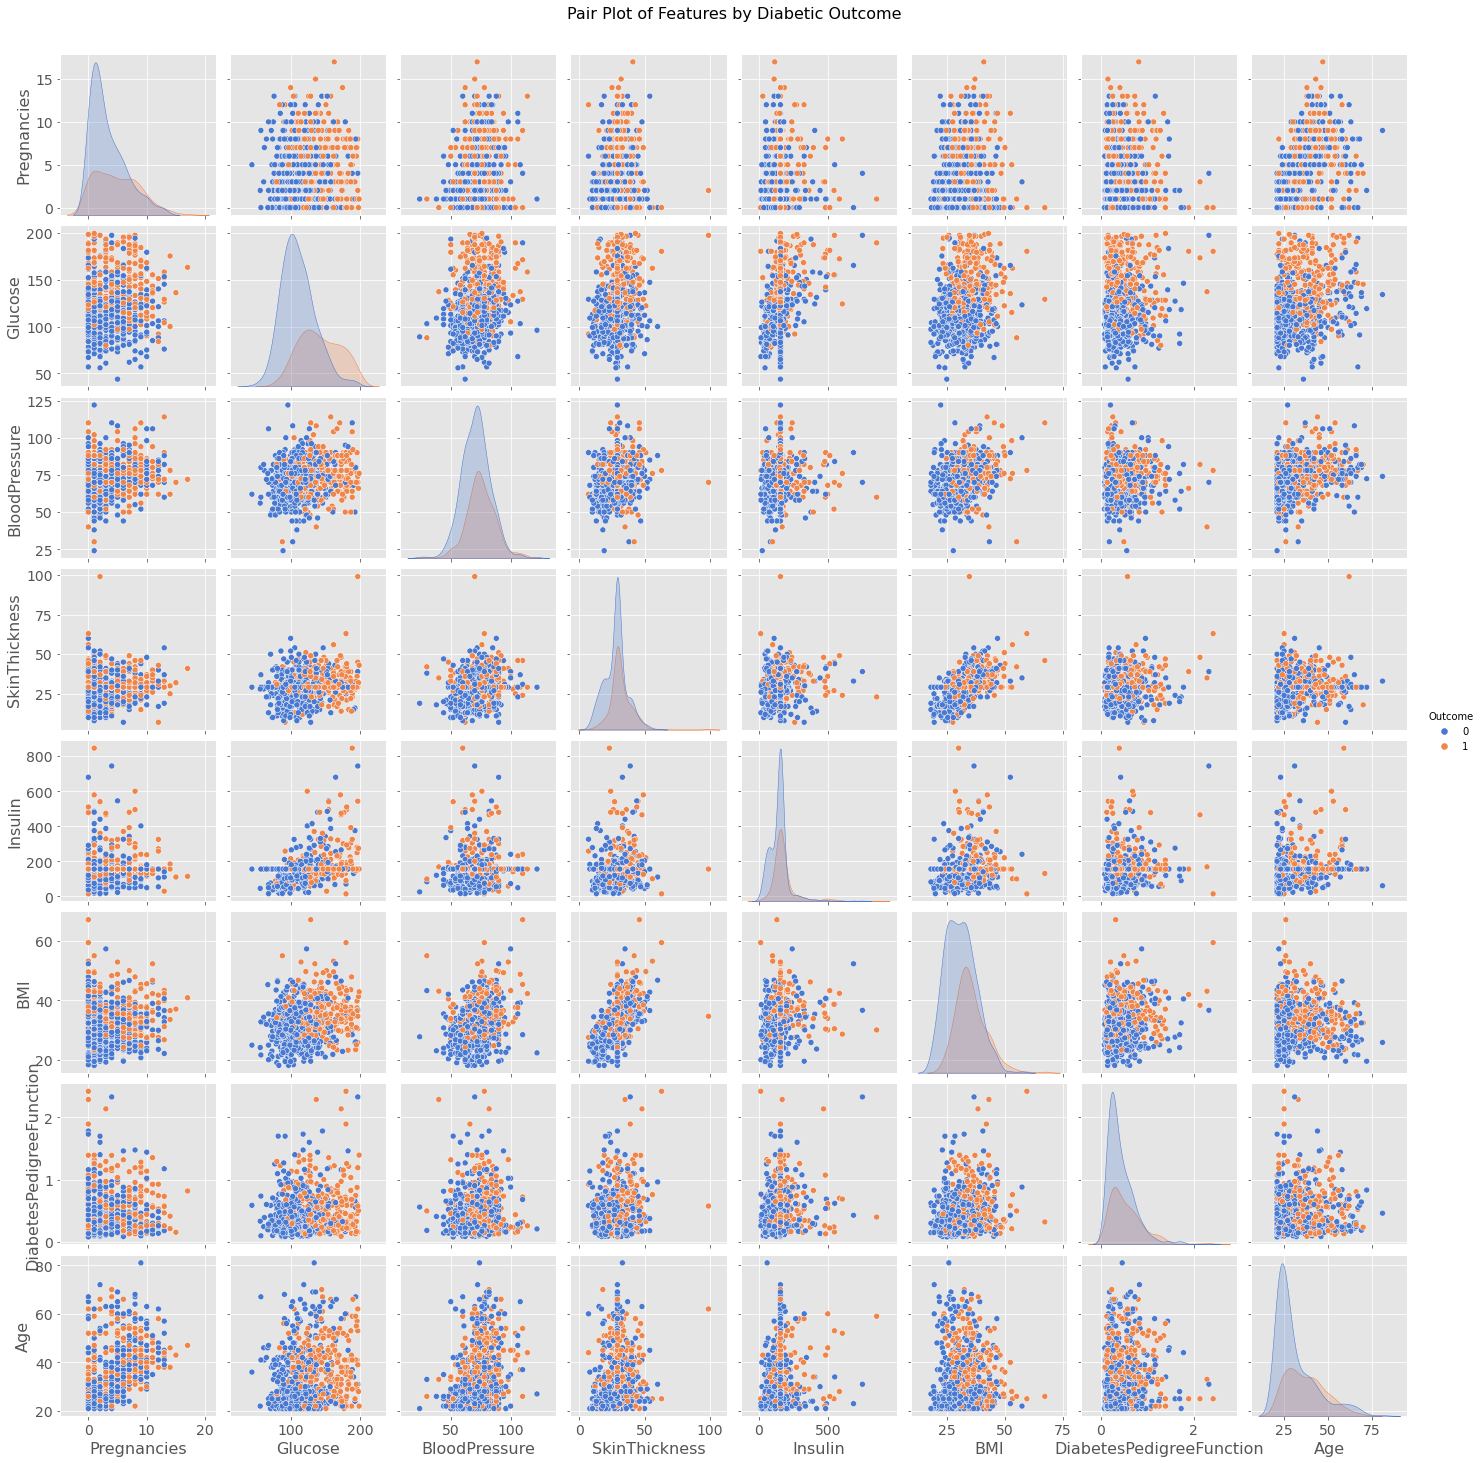

In [34]:

# Create the pair plot
sns.pairplot(df, hue='Outcome', palette='muted', diag_kind='kde')

# Set the title of the pair plot
plt.suptitle("Pair Plot of Features by Diabetic Outcome", y=1.02, fontsize=16)

# Show the plot
plt.show()


## Correlation

In [35]:

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


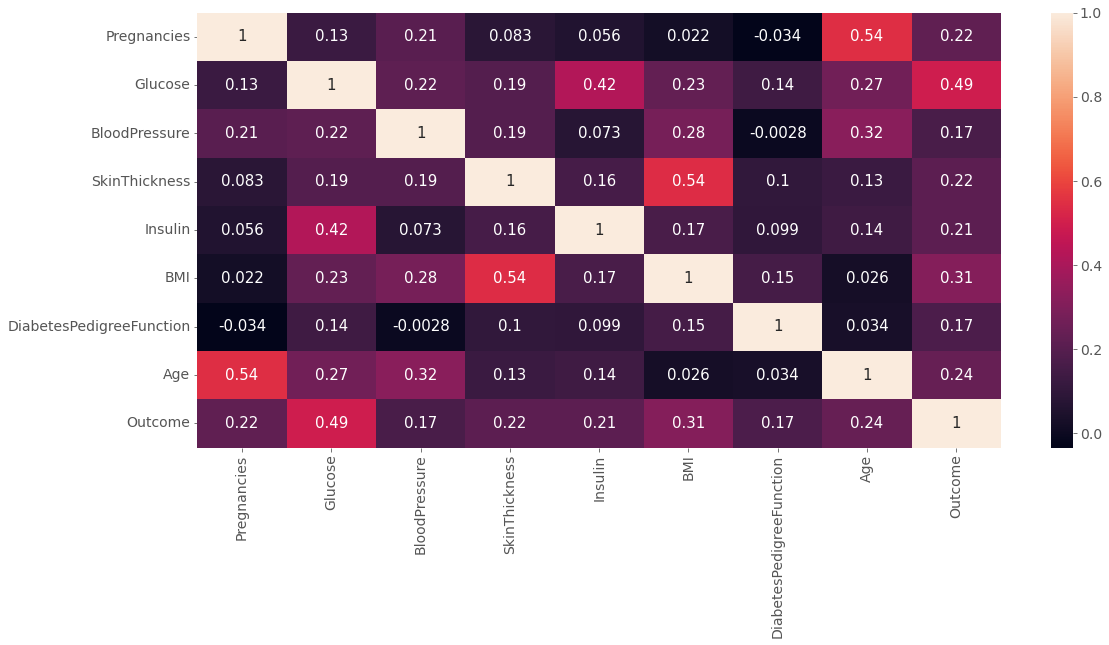

In [36]:
# The correlation matrix measures the linear relationship between pairs of variables in the DataFrame.
fig, ax = plt.subplots(figsize=(18, 8))
 
# drawing the plot
sns.heatmap(data=df.corr(),annot=True, annot_kws={"size": 15}) 
plt.show()

In [37]:
# correlation coefficients between the "target" variable and other variables
print(df.corr()["Outcome"].abs().sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64


<span style='color:Blue'> **Observation:** </span> 

Based on the correlation values:

1. Glucose (Correlation: 0.492928):
   There is a moderate positive correlation between 'Glucose' and 'Outcome'. 
2. BMI (Correlation: 0.311924):
   There is a moderate positive correlation between 'BMI' and 'Outcome'.

Overall, 'Glucose' and 'BMI' seem to have the strongest positive correlation with the 'Outcome' variable, indicating that they might be more influential in predicting diabetes in the given dataset. The other variables have weaker correlations with 'Outcome', suggesting that their impact on diabetes prediction may be less significant.

## Overall Iterpretation of the dataset



1. Age and Diabetes: The number of diabetic patients tends to increase with age until the age of 41, after which it starts to fluctuate and decrease gradually. The age group with the highest number of diabetic patients is 41, followed by age groups 38 and 43.

2. Diabetes and Pregnancy: The number of diabetic individuals increases after 7 pregnancies. Diabetic individuals are comparatively more common in individuals with higher pregnancy counts.

3. Glucose and Diabetes: There is a moderate positive correlation (correlation coefficient: 0.492928) between 'Glucose' levels and the likelihood of having diabetes (Outcome=1). As the 'Glucose' level increases, the probability of diabetes also increases.

4. BMI and Diabetes:  Higher BMI values are associated with a higher likelihood of having diabetes.

5. SkinThickness and Diabetes: There is a weak positive correlation (correlation coefficient: 0.215299) between 'SkinThickness' and 'Outcome'. However, this correlation is not very strong, suggesting that the relationship may not be significant.

6. Insulin and Diabetes: There is a weak positive correlation (correlation coefficient: 0.214411) between 'Insulin' levels and 'Outcome'. Similar to 'SkinThickness', this correlation is not very strong.

7. DiabetesPedigreeFunction and Diabetes: There is a weak positive correlation (correlation coefficient: 0.173844) between 'DiabetesPedigreeFunction' and 'Outcome'. The 'DiabetesPedigreeFunction' may have some influence on the likelihood of diabetes, but the correlation is not strong.

8. BloodPressure and Diabetes: There is a weak positive correlation (correlation coefficient: 0.166074) between 'BloodPressure' and 'Outcome'. However, this correlation is relatively low, suggesting that 'BloodPressure' might not be a strong predictor of diabetes.

- There are outliers in the dataset, which can effect the predictions, the outliers have to be handeled before proceeding for model building.

Overall, the observations and insights suggest that age, glucose levels, and BMI have a more significant influence on diabetes risk in the given dataset. Additionally, the number of pregnancies and certain other factors also show some weak associations with diabetes, but their impact may not be as substantial as age, glucose, and BMI. Understanding these correlations can help identify potential risk factors for diabetes and assist in developing effective preventive strategies.

## "Thank you for reading all the way till the end."